# EDA

In [48]:
import os
import pandas as pd
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /home/erick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def merge_text_list(text_list):
    result = []
    for value in text_list:
        result.extend(value)
    return result

In [17]:
DATA_PATH = "../data/"

In [18]:
raw_data = pd.read_csv(DATA_PATH+"raw_data.csv")

In [19]:
raw_data

value                 label
0     otorgo estas calificaciones debido a que (i) m...    actitud_repartidor
1     según se perdieron no es la primera vez que co...    actitud_repartidor
2     cobran más que lo estipulado en el ticket adem...    actitud_repartidor
3     hubo muchos problemas esta vez la orden llego ...    actitud_repartidor
4             perdieron mi ticket y no me lo entregaron    actitud_repartidor
...                                                 ...                   ...
1574  van varias semanas que la persona que entrega ...  material_para_surtir
1575  antes el servicio era genial llevaban huacales...  material_para_surtir
1576  está bien que den trabajo a las personas con e...  material_para_surtir
1577  prq traen las comestibles sueltos  hoy trajero...  material_para_surtir
1578  el repartidor me entregó mi mercancía en el pu...  material_para_surtir

[1579 rows x 2 columns]

## Label Counts

<AxesSubplot:xlabel='count', ylabel='label'>

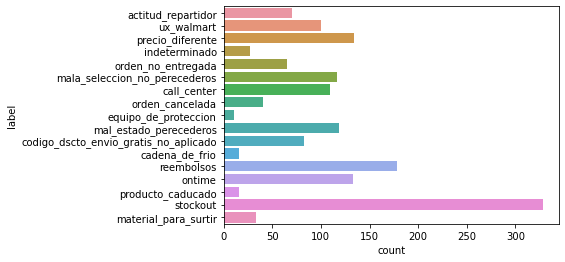

In [20]:
sns.countplot(y="label", data=raw_data)

## Most Common words

In [43]:
words_list = raw_data["value"].apply(lambda x:str(x).split())
words_raw = [item for sublist in words_list for item in sublist]
words_raw_count = Counter(words_raw)

### Top 20 common words

In [44]:
top_common = pd.DataFrame(words_raw_count.most_common(20))
top_common.columns = ['Common_words','count']
top_common

Common_words  count
0           que   3334
1            de   3039
2             y   2789
3            me   2582
4            no   2561
5            el   2271
6            la   1913
7            en   1590
8             a   1312
9            lo   1035
10       pedido    981
11           mi    927
12          por    894
13          los    784
14           se    784
15           un    757
16         para    657
17          las    600
18          con    561
19    productos    544

We have to many stop words in the courpus, so we have to remove them

In [45]:
words_list_clean = [word for word in words_raw if word not in stopwords.words('spanish')]
words_count = Counter(words_list_clean)

In [47]:
top_common = pd.DataFrame(words_count.most_common(20))
top_common.columns = ['Common_words','count']
top_common

Common_words  count
0        pedido    981
1     productos    544
2            si    354
3       entrega    287
4      producto    256
5          pedí    254
6      servicio    232
7         llegó    227
8      cobraron    215
9        tienda    211
10          día    206
11          mal    191
12        cosas    176
13        nunca    165
14     trajeron    156
15   repartidor    149
16       compra    142
17            2    141
18      después    136
19     mandaron    133

# Wordclouds

In [60]:
figure_size=(20.0,16.0)

In [61]:
corpus = " ".join(words_list_clean)
# Generate a word cloud image
wordcloud = WordCloud().generate(corpus)

# Display the generated image:
plt.figure(figsize=figure_size)
plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')

# WordCloud by Label

In [63]:
labels = raw_data.label.unique()

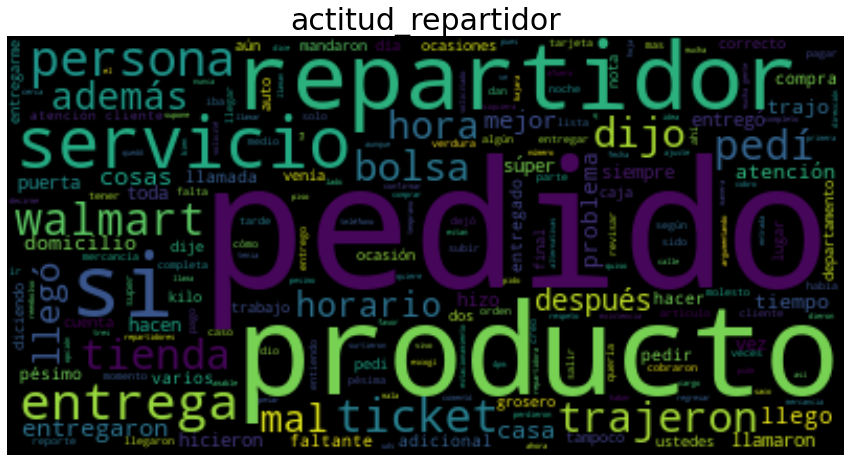

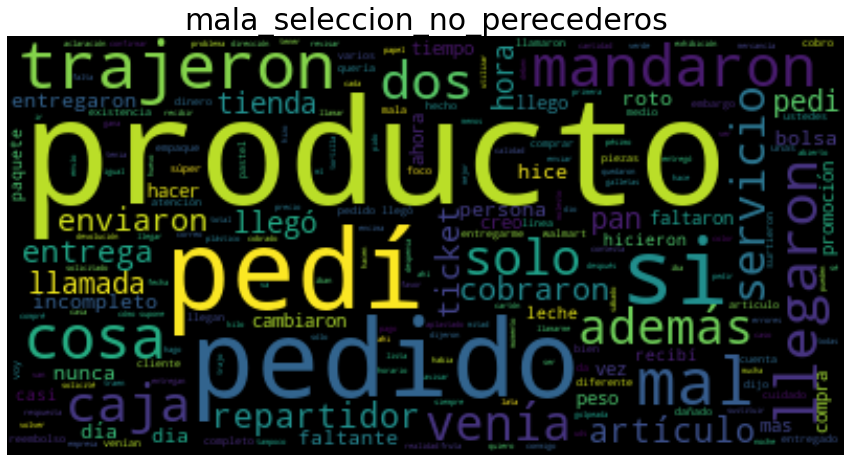

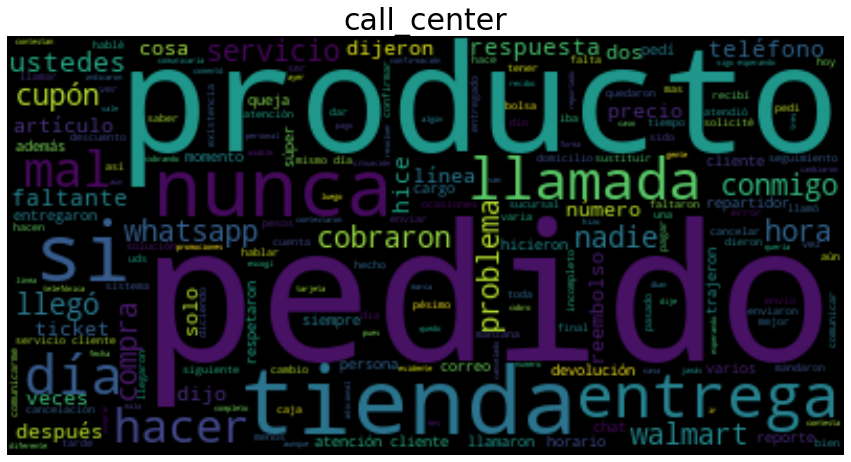

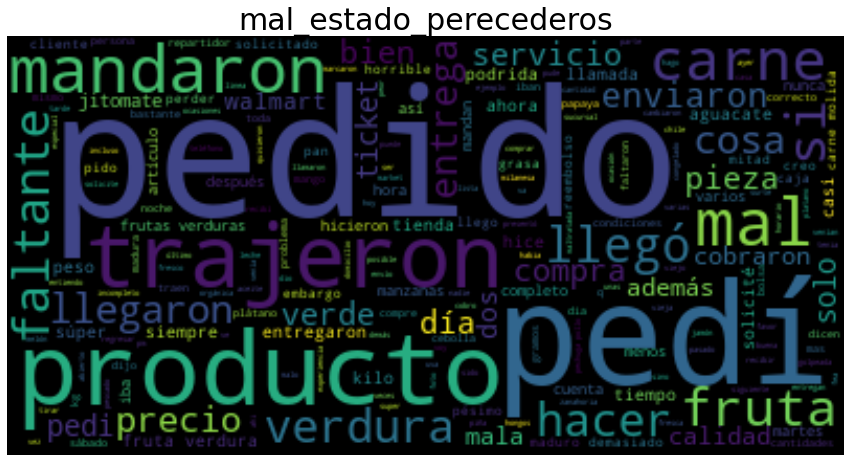

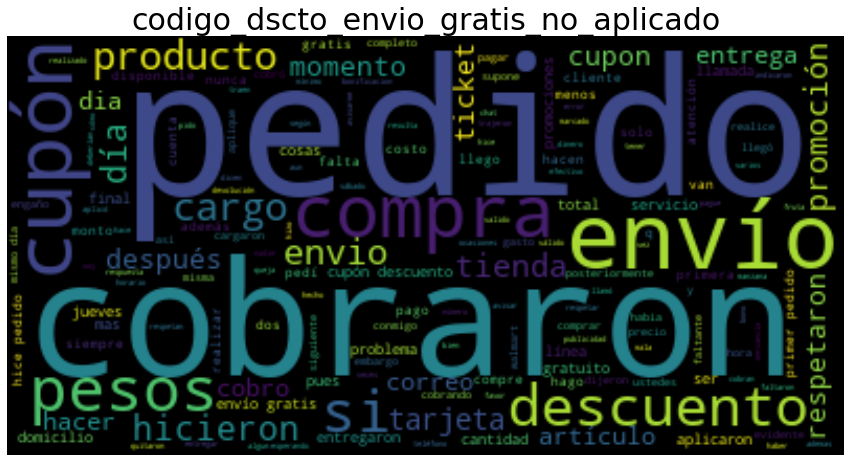

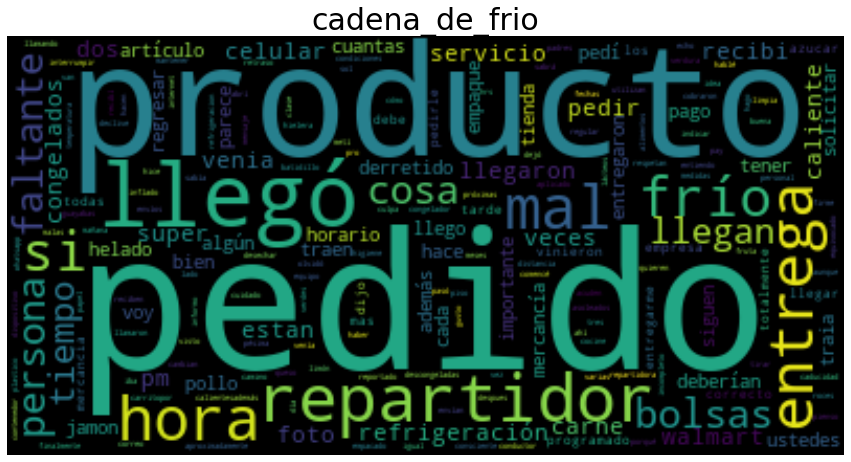

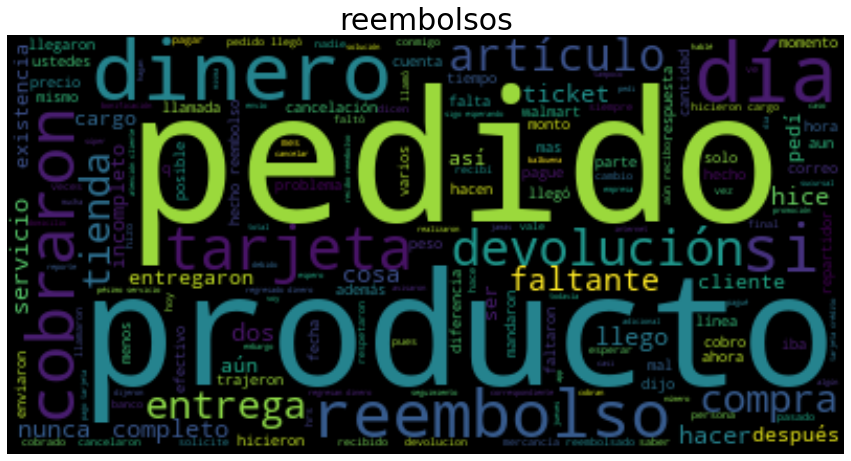

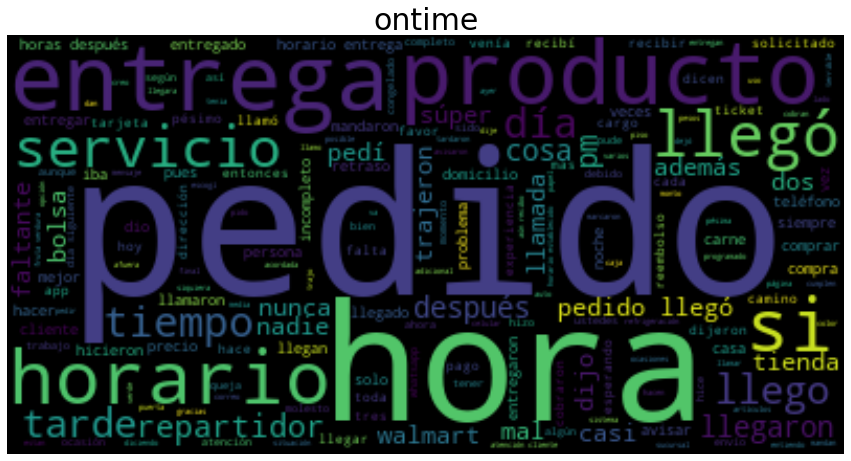

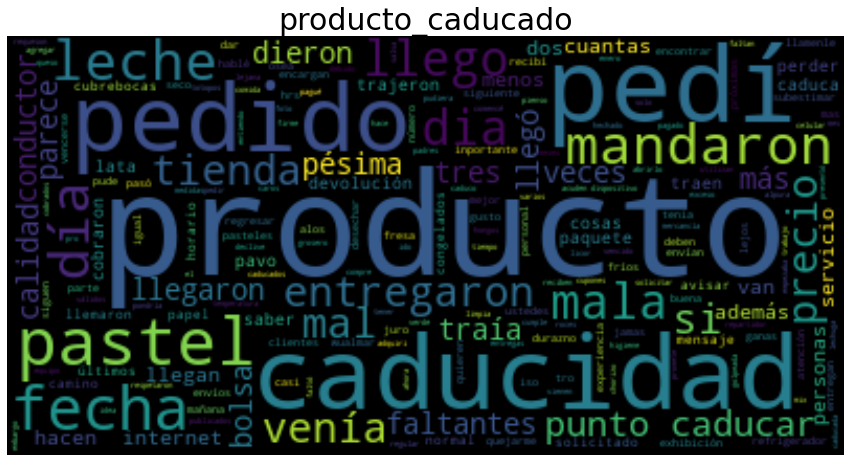

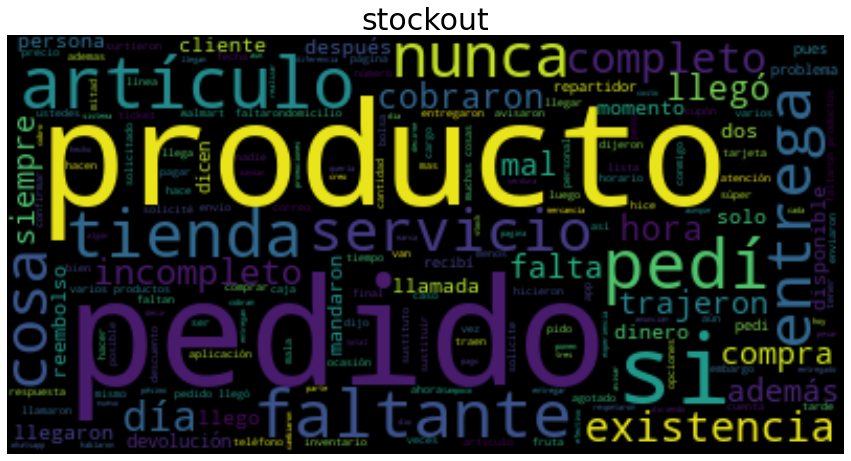

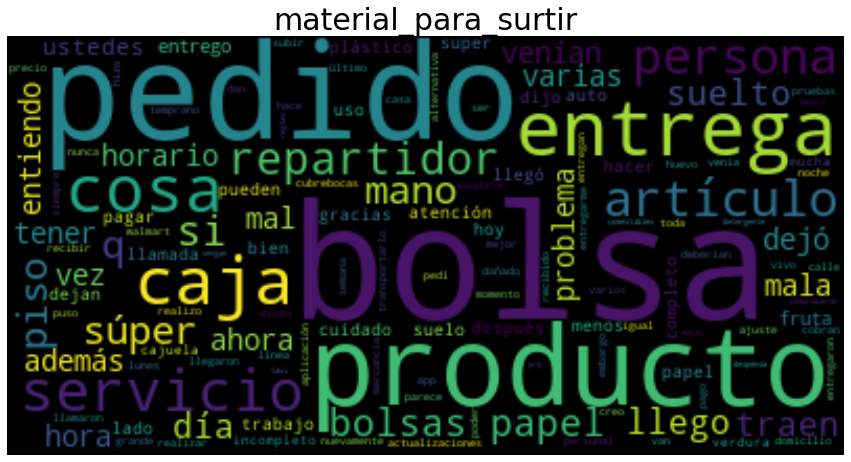

In [68]:
figure_size=(15.0,10.0)
title_size=30

for label in labels:
    data = raw_data[raw_data.label == label]
    words_list = data["value"].apply(lambda x:str(x).split())
    words_raw = [item for sublist in words_list for item in sublist]
    words_list_clean = [word for word in words_raw if word not in stopwords.words('spanish')]
    corpus = " ".join(words_list_clean)
    # Generate a word cloud image
    wordcloud = WordCloud().generate(corpus)
    plt.figure(figsize=figure_size)
    plt.axis("off")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(label, fontdict={'size': title_size})